In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from HMM_BNP_func import DP_GMM
import time
import pandas as pd
plt.rc('font',family='Times New Roman')
sns.set_theme(font='Times New Roman',font_scale=1.4)

# demo of PE task （full task is in PE.py）

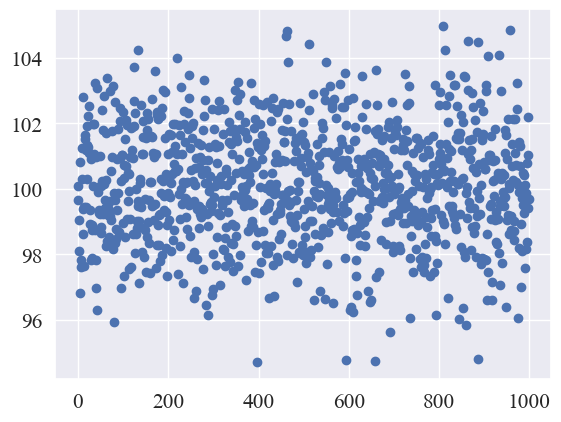

In [2]:
data_path = "dataset/D1/"
type = 'jitter/'
Theta_hat = []
hammings = []
for i in range(10):
    
    D = np.load(data_path+type+str(i+1)+'.npy',allow_pickle = True)
    # #非理想数据读取
    # X = np.array([D[0][:,0]]).T
    # Z = np.array([D[0][:,1]]).T
    # bkps_truth = D[1]
    #理想数据读取
    X = np.array([D[:,0]]).T
    Z = np.array([D[:,1]]).T
    plt.scatter(range(len(X)), X)
    break
    # model = DP_GMM(X, K=15, Z=Z, agile=True, kappa = 0.2)
    # model.init_q_param()#初始化q分布
    # model.mixture_fit()#DPMM
    # model.HMM_fit()
    # mu,Z,A = model.del_irr()
    # Theta_hat.append(mu)
    # hammings.append(model.hamming)

# post processing 通过计算后的数据进行数据分析

## PE task 实验一
计算BNPHMM对于隐含状态个数的估计能力。 

计算收敛后的汉明距离

### 读取PE的结果

In [3]:
#data path
data_path = "dataset/D1/"
types = ['dwell/','jitter/','agile/','sliding/','stagger/']

kappas = np.linspace(0,1,3)
# type = 'stagger/'
deltak_all = []
MSE_all = []
HD_all = []
for type in types:
    for kappa in kappas:
        Theta_hats = np.load(data_path + type + 'result/Theta_hat_kappa' + str(kappa) + '.npy', allow_pickle = True)
        hammings = np.load(data_path + type + 'result/hamming_kappa' + str(kappa) + '.npy', allow_pickle= True)

        deltak = []
        if type == 'jitter/':
            for Theta_hat in Theta_hats:
                deltak.append(Theta_hat.shape[0] - 1)
        else:
            for Theta_hat in Theta_hats:
                deltak.append(Theta_hat.shape[0] - 5)
        deltak_all.append(np.mean(deltak))

        HD = []
        for hamming in hammings:
            HD.append(hamming[-1])
        HD_all.append(np.mean(HD))     

        SE = []
        if type == 'jitter/':
            for Theta_hat in Theta_hats:
                temp = []
                for theta in [100]:
                    temp.append(min(np.square(Theta_hat - theta)))
                SE.append(np.mean(temp))
        else:
            for Theta_hat in Theta_hats:
                temp = []
                for theta in [100,110,120,130,140]:
                    temp.append(min(np.square(Theta_hat - theta)))
                SE.append(np.mean(temp))
        MSE_all.append(np.mean(SE))

### 计算汉明距离

In [4]:
HD_all = np.array(HD_all)
columns = ['hamming distance']
indexes = ['dwell','jitter','agile','sliding','stagger']
index = []
for i in indexes:
    for j in range(3):
        index.append(i)
df = pd.DataFrame(HD_all,columns=columns)
df['type'] = index
df['kappa'] = [0,0.5,1] * 5
df.to_csv('results/hamming_distance.csv',index=False)

### 计算deltak

In [5]:
deltak_all = np.array(deltak_all)
columns = ['deltak']
indexes = ['dwell','jitter','agile','sliding','stagger']
index = []
for i in indexes:
    for j in range(3):
        index.append(i)
df = pd.DataFrame(deltak_all,columns=columns)
df['kappa'] = [0,0.5,1] * 5
df['type'] = index
df.to_csv('results/estimated_deltak.csv',index=False)

### 计算MSE

In [6]:
MSE_all = np.array(MSE_all)
columns = ['MSE']
indexes = ['dwell','jitter','agile','sliding','stagger']
index = []
for i in indexes:
    for j in range(3):
        index.append(i)
df = pd.DataFrame(deltak_all,columns=columns)
df['kappa'] = [0,0.5,1] * 5
df['type'] = index
df.to_csv('results/MSE.csv',index=False)

### 绘制结果图

#### 1. deltak

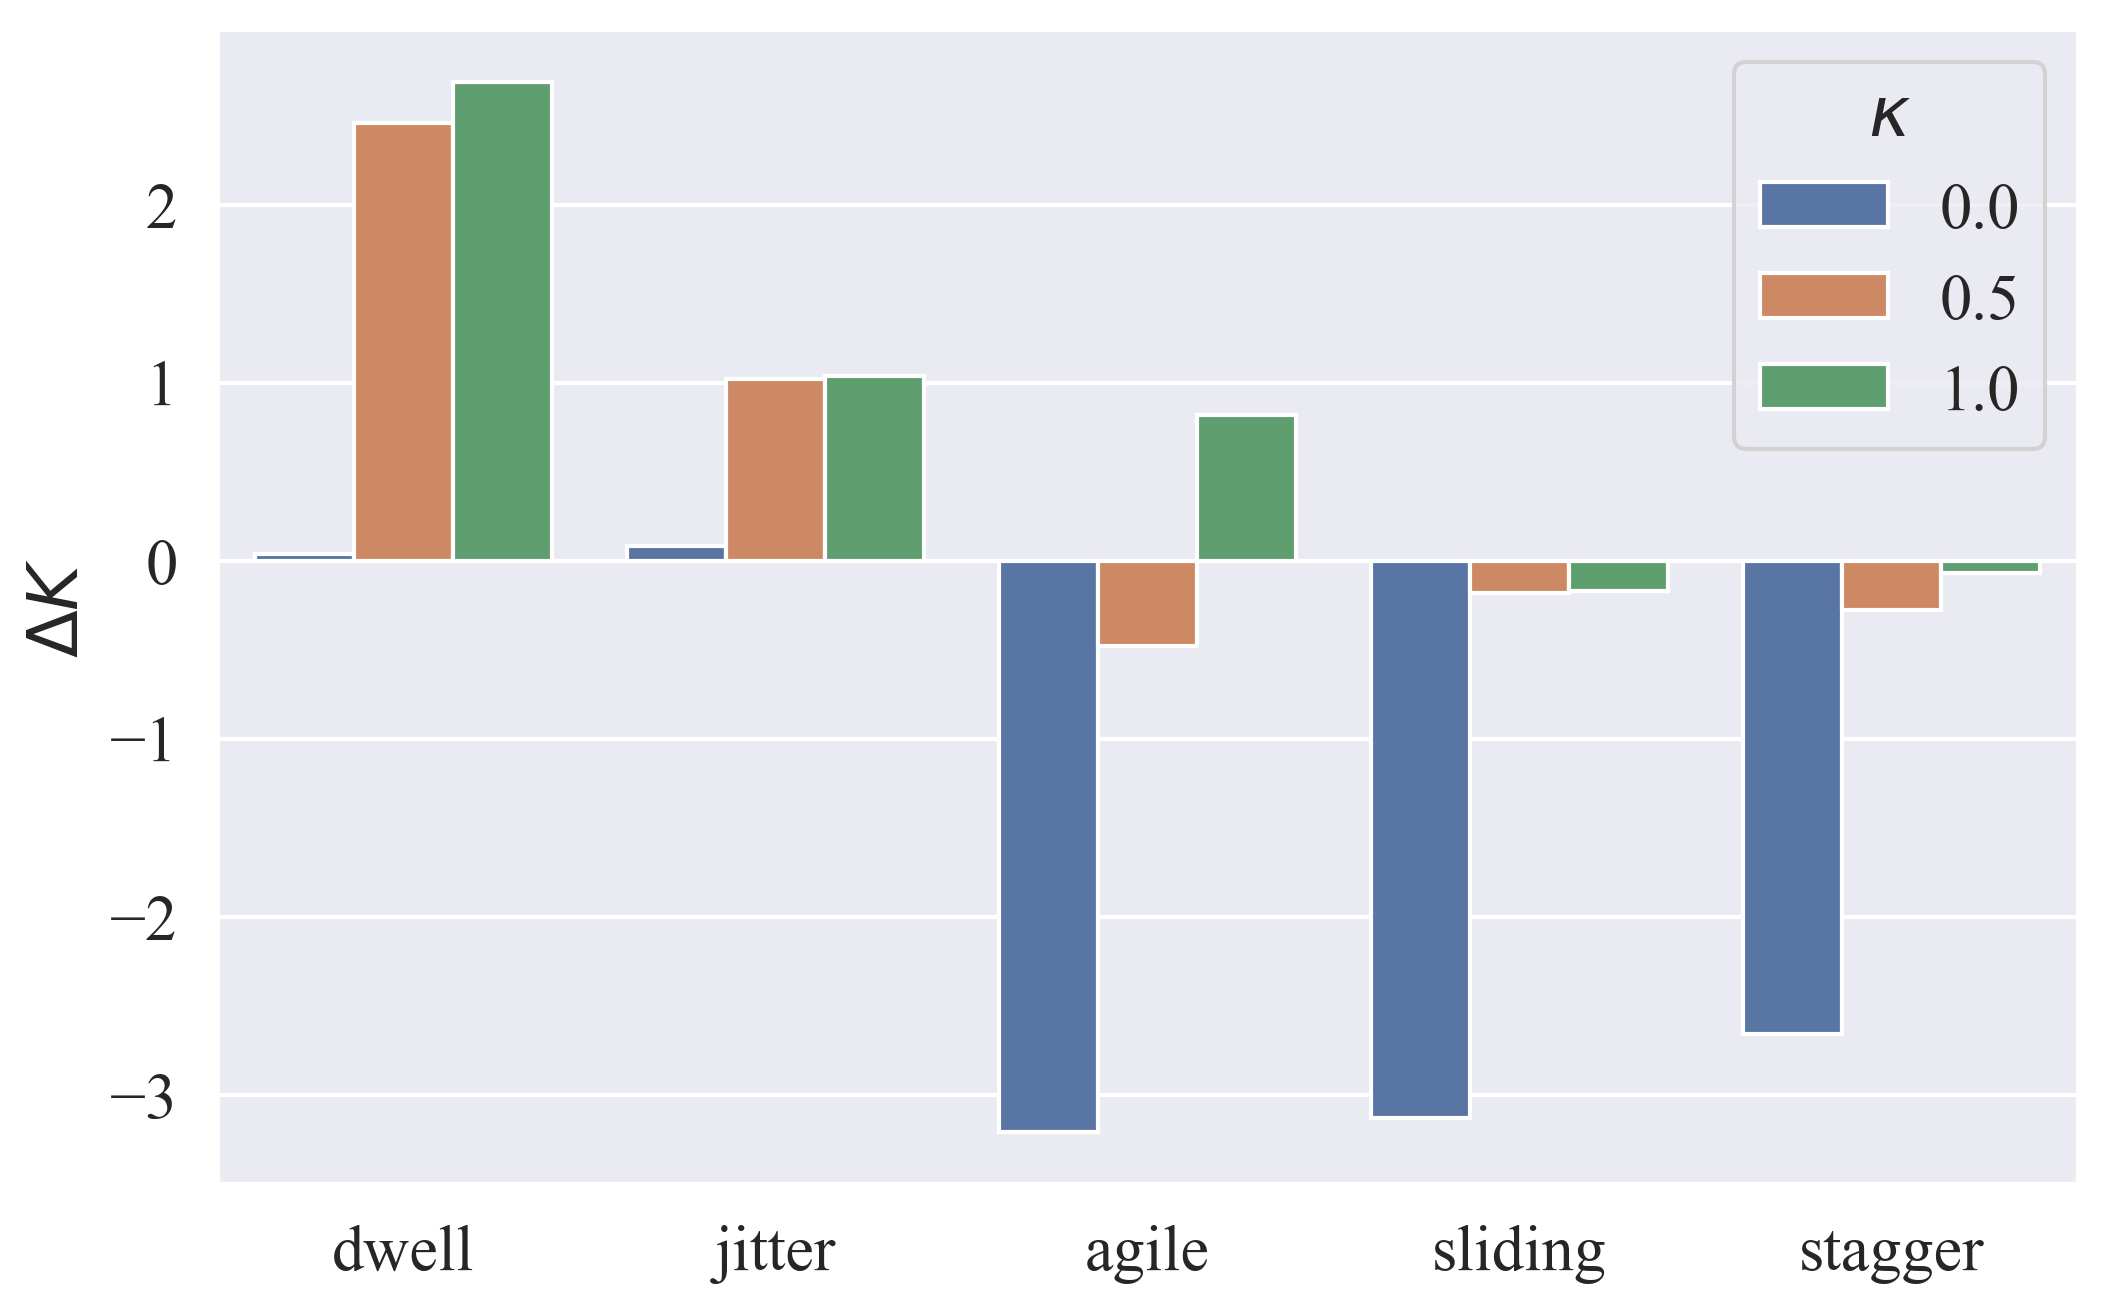

In [7]:
#读取
num = pd.read_csv("results/estimated_deltak.csv")
num = pd.DataFrame(num)
# num.rename(columns={"Unnamed: 0": "type"},inplace=True)
num.head(5)

#画图
plt.figure(dpi=300,figsize=(8,5))
fig = sns.barplot(x = 'type', y='deltak', data = num, hue='kappa')
plt.legend(title='$\\kappa$', loc='upper right')
fig.set_xlabel('')
fig.set_ylabel(r'$\Delta K$')

#保存
barfig = fig.get_figure()
barfig.savefig("results/estimated_deltak.png",dpi=300)

#### 2. 汉明距离

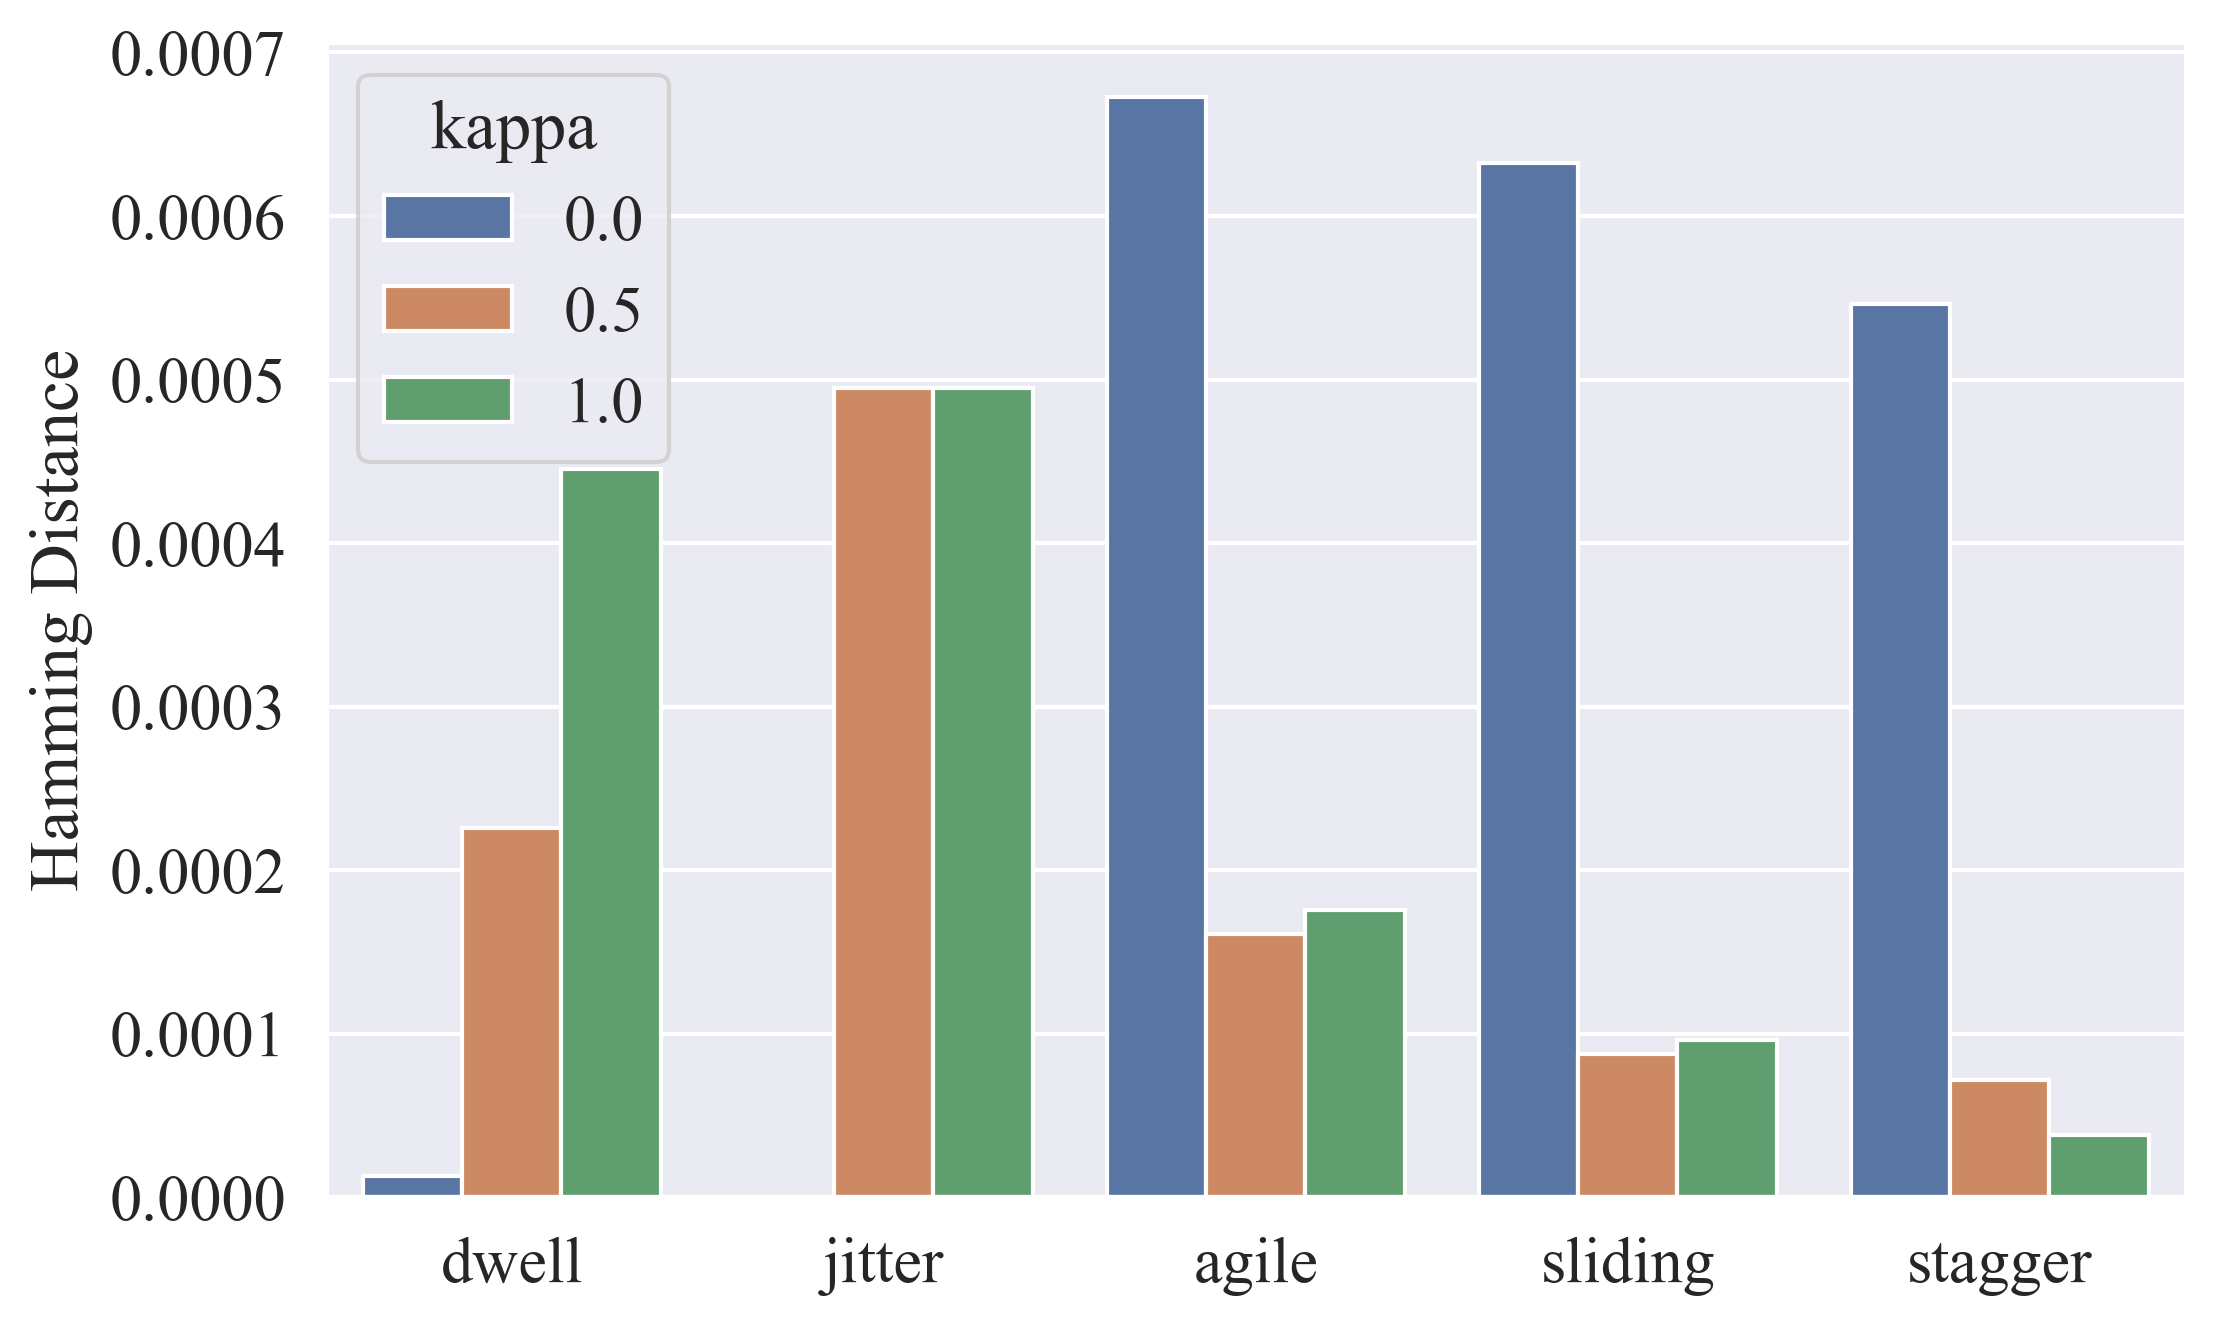

In [8]:
#读取
num = pd.read_csv("results/hamming_distance.csv")
num = pd.DataFrame(num)
num.rename(columns={"Unnamed: 0": "type"},inplace=True)
num.head(5)

#画图
plt.figure(dpi=300,figsize=(8,5))
fig = sns.barplot(x = 'type', y='hamming distance', data = num, hue='kappa')
fig.set_xlabel('')
fig.set_ylabel('Hamming Distance')
#保存
barfig = fig.get_figure()
barfig.savefig("results/hamming_distance.png",dpi=300)

#### 3.MSE

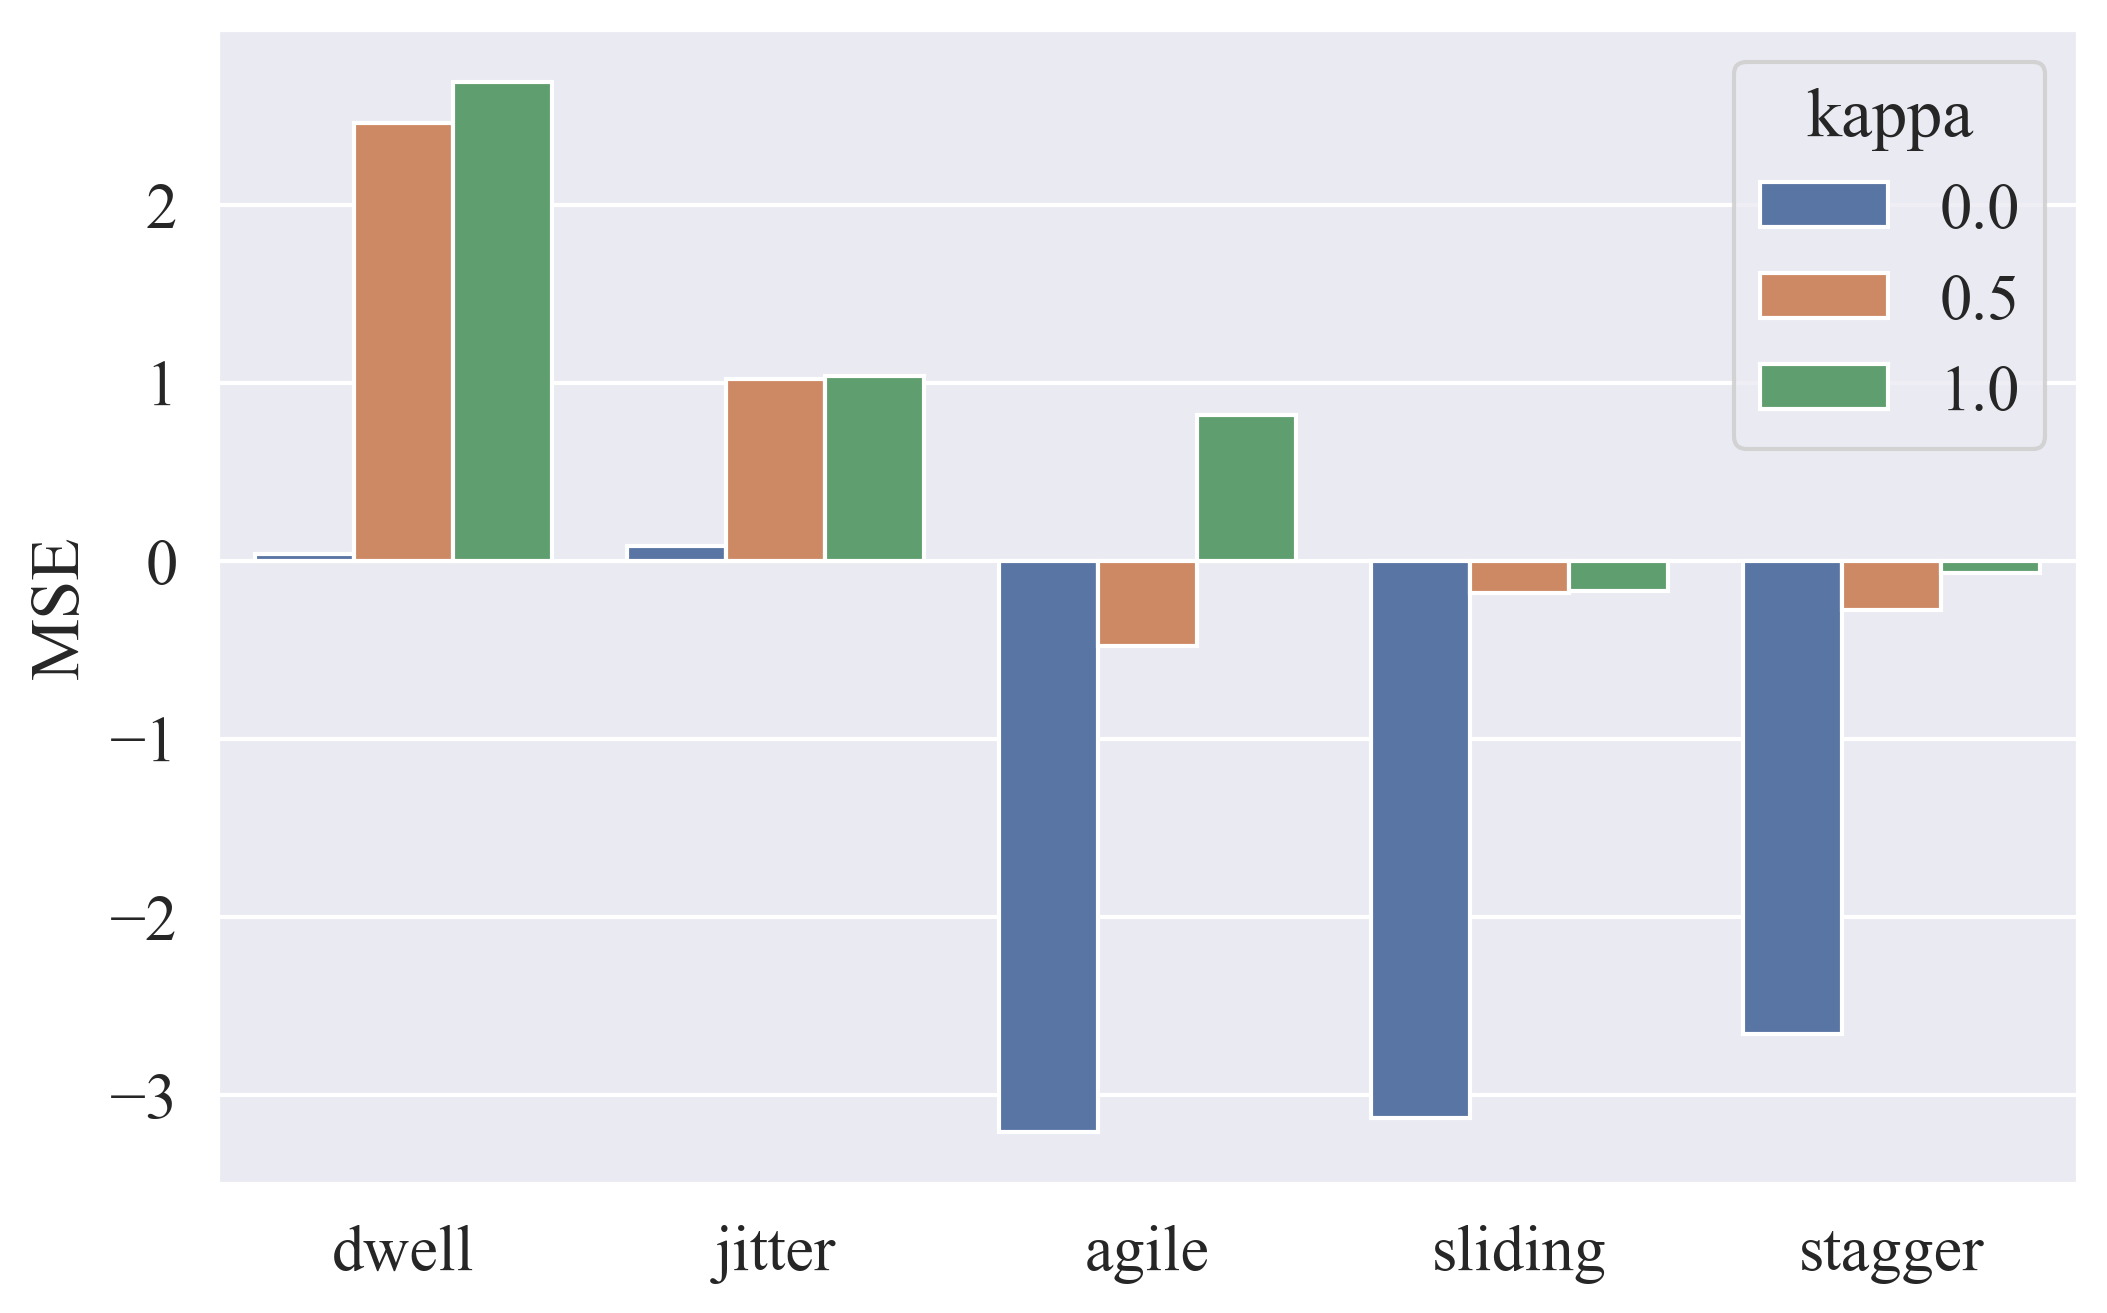

In [9]:
#读取
num = pd.read_csv("results/MSE.csv")
num = pd.DataFrame(num)
# num.rename(columns={"Unnamed: 0": "type"},inplace=True)
num.head(5)

#画图
plt.figure(dpi=300,figsize=(8,5))
fig = sns.barplot(x = 'type', y='MSE', data = num, hue='kappa')
fig.set_xlabel('')
fig.set_ylabel('MSE')
#保存
barfig = fig.get_figure()
barfig.savefig("results/MSE.png",dpi=300)

## PE task 实验二
在非理想观测的条件下，在脉冲序列中添加虚假和缺失脉冲

计算BNPHMM对于隐含状态个数的估计能力 

计算收敛后的汉明距离

### 读取PE的结果

In [10]:
#data path
data_paths = ["dataset/D1/","dataset/D1_unideal001/","dataset/D1_unideal005/","dataset/D1_unideal010/","dataset/D1_unideal020/"]
# data_path = "dataset/D1_unideal001/"
types = ['dwell/','jitter/','agile/','sliding/','stagger/']

kappas = np.linspace(0,1,3)
# types = ['agile/']
deltak_all = []
MSE_all = []
HD_all = []
for data_path in data_paths:
    for type in types:
        for kappa in kappas:
            Theta_hats = np.load(data_path + type + 'result/Theta_hat_kappa' + str(kappa) + '.npy', allow_pickle = True)
            hammings = np.load(data_path + type + 'result/hamming_kappa' + str(kappa) + '.npy', allow_pickle= True)

            deltak = []
            if type == 'jitter/':
                for Theta_hat in Theta_hats:
                    deltak.append(Theta_hat.shape[0] - 1)
            else:
                for Theta_hat in Theta_hats:
                    deltak.append(Theta_hat.shape[0] - 5)
            deltak_all.append(np.mean(deltak))

            HD = []
            for hamming in hammings:
                HD.append(hamming[-1])
            HD_all.append(np.mean(HD))   

            SE = []
            if type == 'jitter/':
                for Theta_hat in Theta_hats:
                    temp = []
                    for theta in [100]:
                        temp.append(min(np.square(Theta_hat - theta)))
                    SE.append(np.mean(temp))
            else:
                for Theta_hat in Theta_hats:
                    temp = []
                    for theta in [100,110,120,130,140]:
                        temp.append(min(np.square(Theta_hat - theta)))
                    SE.append(np.mean(temp))
            MSE_all.append(np.mean(SE))    

### 整理deltak的数据

In [ ]:
deltak_all = np.array(deltak_all)
for i in range(len(deltak_all)):
    if deltak_all[i] == 0:
        deltak_all[i] = 0.05
columns = ['deltak']
indexes = ['dwell','jitter','agile','sliding','stagger']
type = []
unideal = []
for un in [1, 5, 10, 20]:
    for i in indexes:
        for j in range(3):
            type.append(i)
    for k in range(15):
        unideal.append(un)

df = pd.DataFrame(deltak_all, columns=columns)
df['type'] = type
df['kappa'] = [0,0.5,1] * 5 * 4
df['unideal'] = unideal
df.to_csv('results/estimated_deltak_unideal.csv',index=False)

### 整理HD的数据

In [12]:
HD_all = np.array(HD_all)
columns = ['hamming distance']
indexes = ['dwell','jitter','agile','sliding','stagger']
index = []
type = []
unideal = []

for un in [0,1,5,10,20]:
    for i in indexes:
        for j in range(3):
            type.append(i)
    for k in range(15):
        unideal.append(un)

df = pd.DataFrame(HD_all,columns=columns)
df['kappa'] = [0,0.5,1] * 5 * 5
df['type'] = type
df['unideal'] = unideal
df.to_csv('results/hamming_distance_unideal.csv')

### 整理MSE的数据

In [43]:
MSE_all = np.array(MSE_all)
columns = ['MSE']
indexes = ['dwell','jitter','agile','sliding','stagger']
index = []
type = []
unideal = []

for un in [0,1,5,10,20]:
    for i in indexes:
        for j in range(3):
            type.append(i)
    for k in range(15):
        unideal.append(un)

df = pd.DataFrame(HD_all,columns=columns)
df['kappa'] = [0,0.5,1] * 5 * 5
df['type'] = type
df['unideal'] = unideal
df.to_csv('results/MSE_unideal.csv',index=False)

### 绘制结果图

#### 1.deltak

##### kappa=0

In [ ]:
#读取
num = pd.read_csv("results/estimated_deltak_unideal.csv")
num = pd.DataFrame(num)

#绘图，折线图
plt.figure(dpi=300,figsize=(10,8))
fig = sns.barplot(x='type', y='deltak', hue='unideal', data=num.loc[num['kappa']==0])
fig.set_xlabel('modulation type')
fig.set_ylabel(r'$\Delta K$')
fig.set_title("$\\kappa=0$")
plt.legend(title='unideal ratio(%)')

#保存
barfig.savefig("results/estimated_deltak_unideal_kappa0.png",dpi=300)

##### kappa=0.5

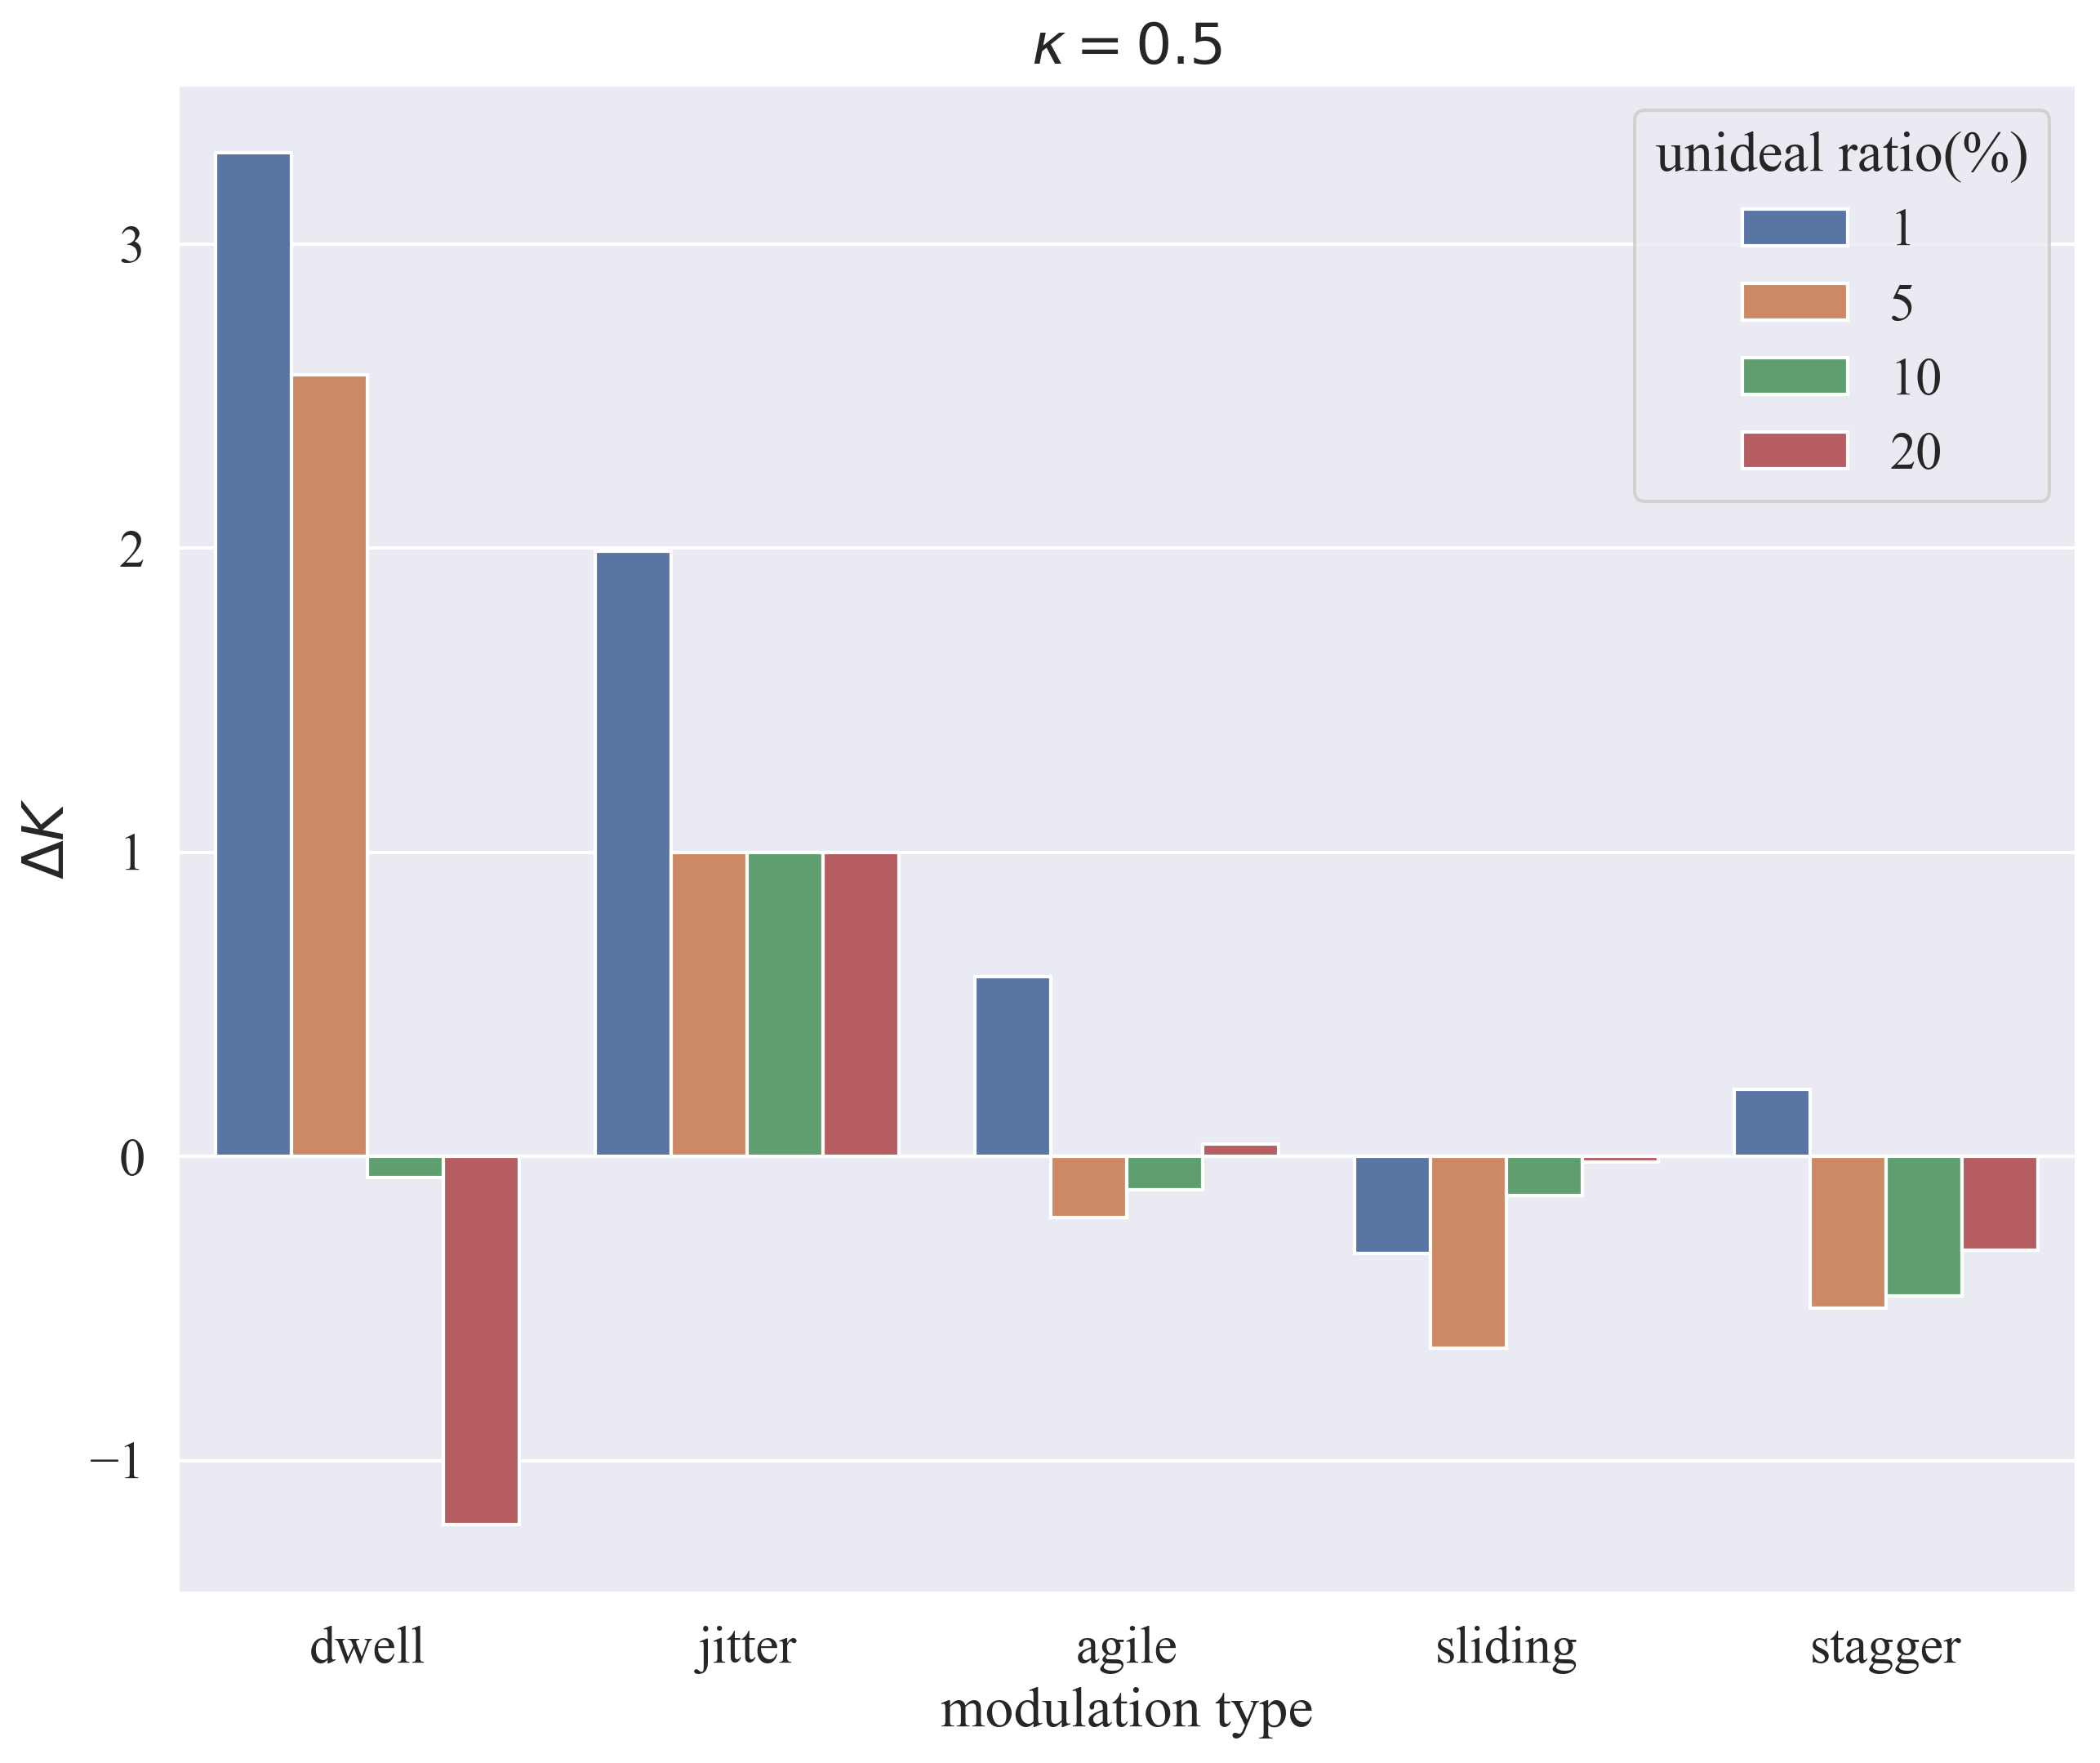

In [37]:
#读取
num = pd.read_csv("results/estimated_deltak_unideal.csv")
num = pd.DataFrame(num)

#绘图，折线图
plt.figure(dpi=300,figsize=(10,8))
fig = sns.barplot(x='type', y='deltak', hue='unideal', data=num.loc[num['kappa']==0.5])
fig.set_xlabel('modulation type')
fig.set_ylabel(r'$\Delta K$')
fig.set_title("$\\kappa=0.5$")
plt.legend(title='unideal ratio(%)')

#保存
barfig.savefig("results/estimated_deltak_unideal_kappa05.png",dpi=300)

#### 2.HD

##### kappa=0

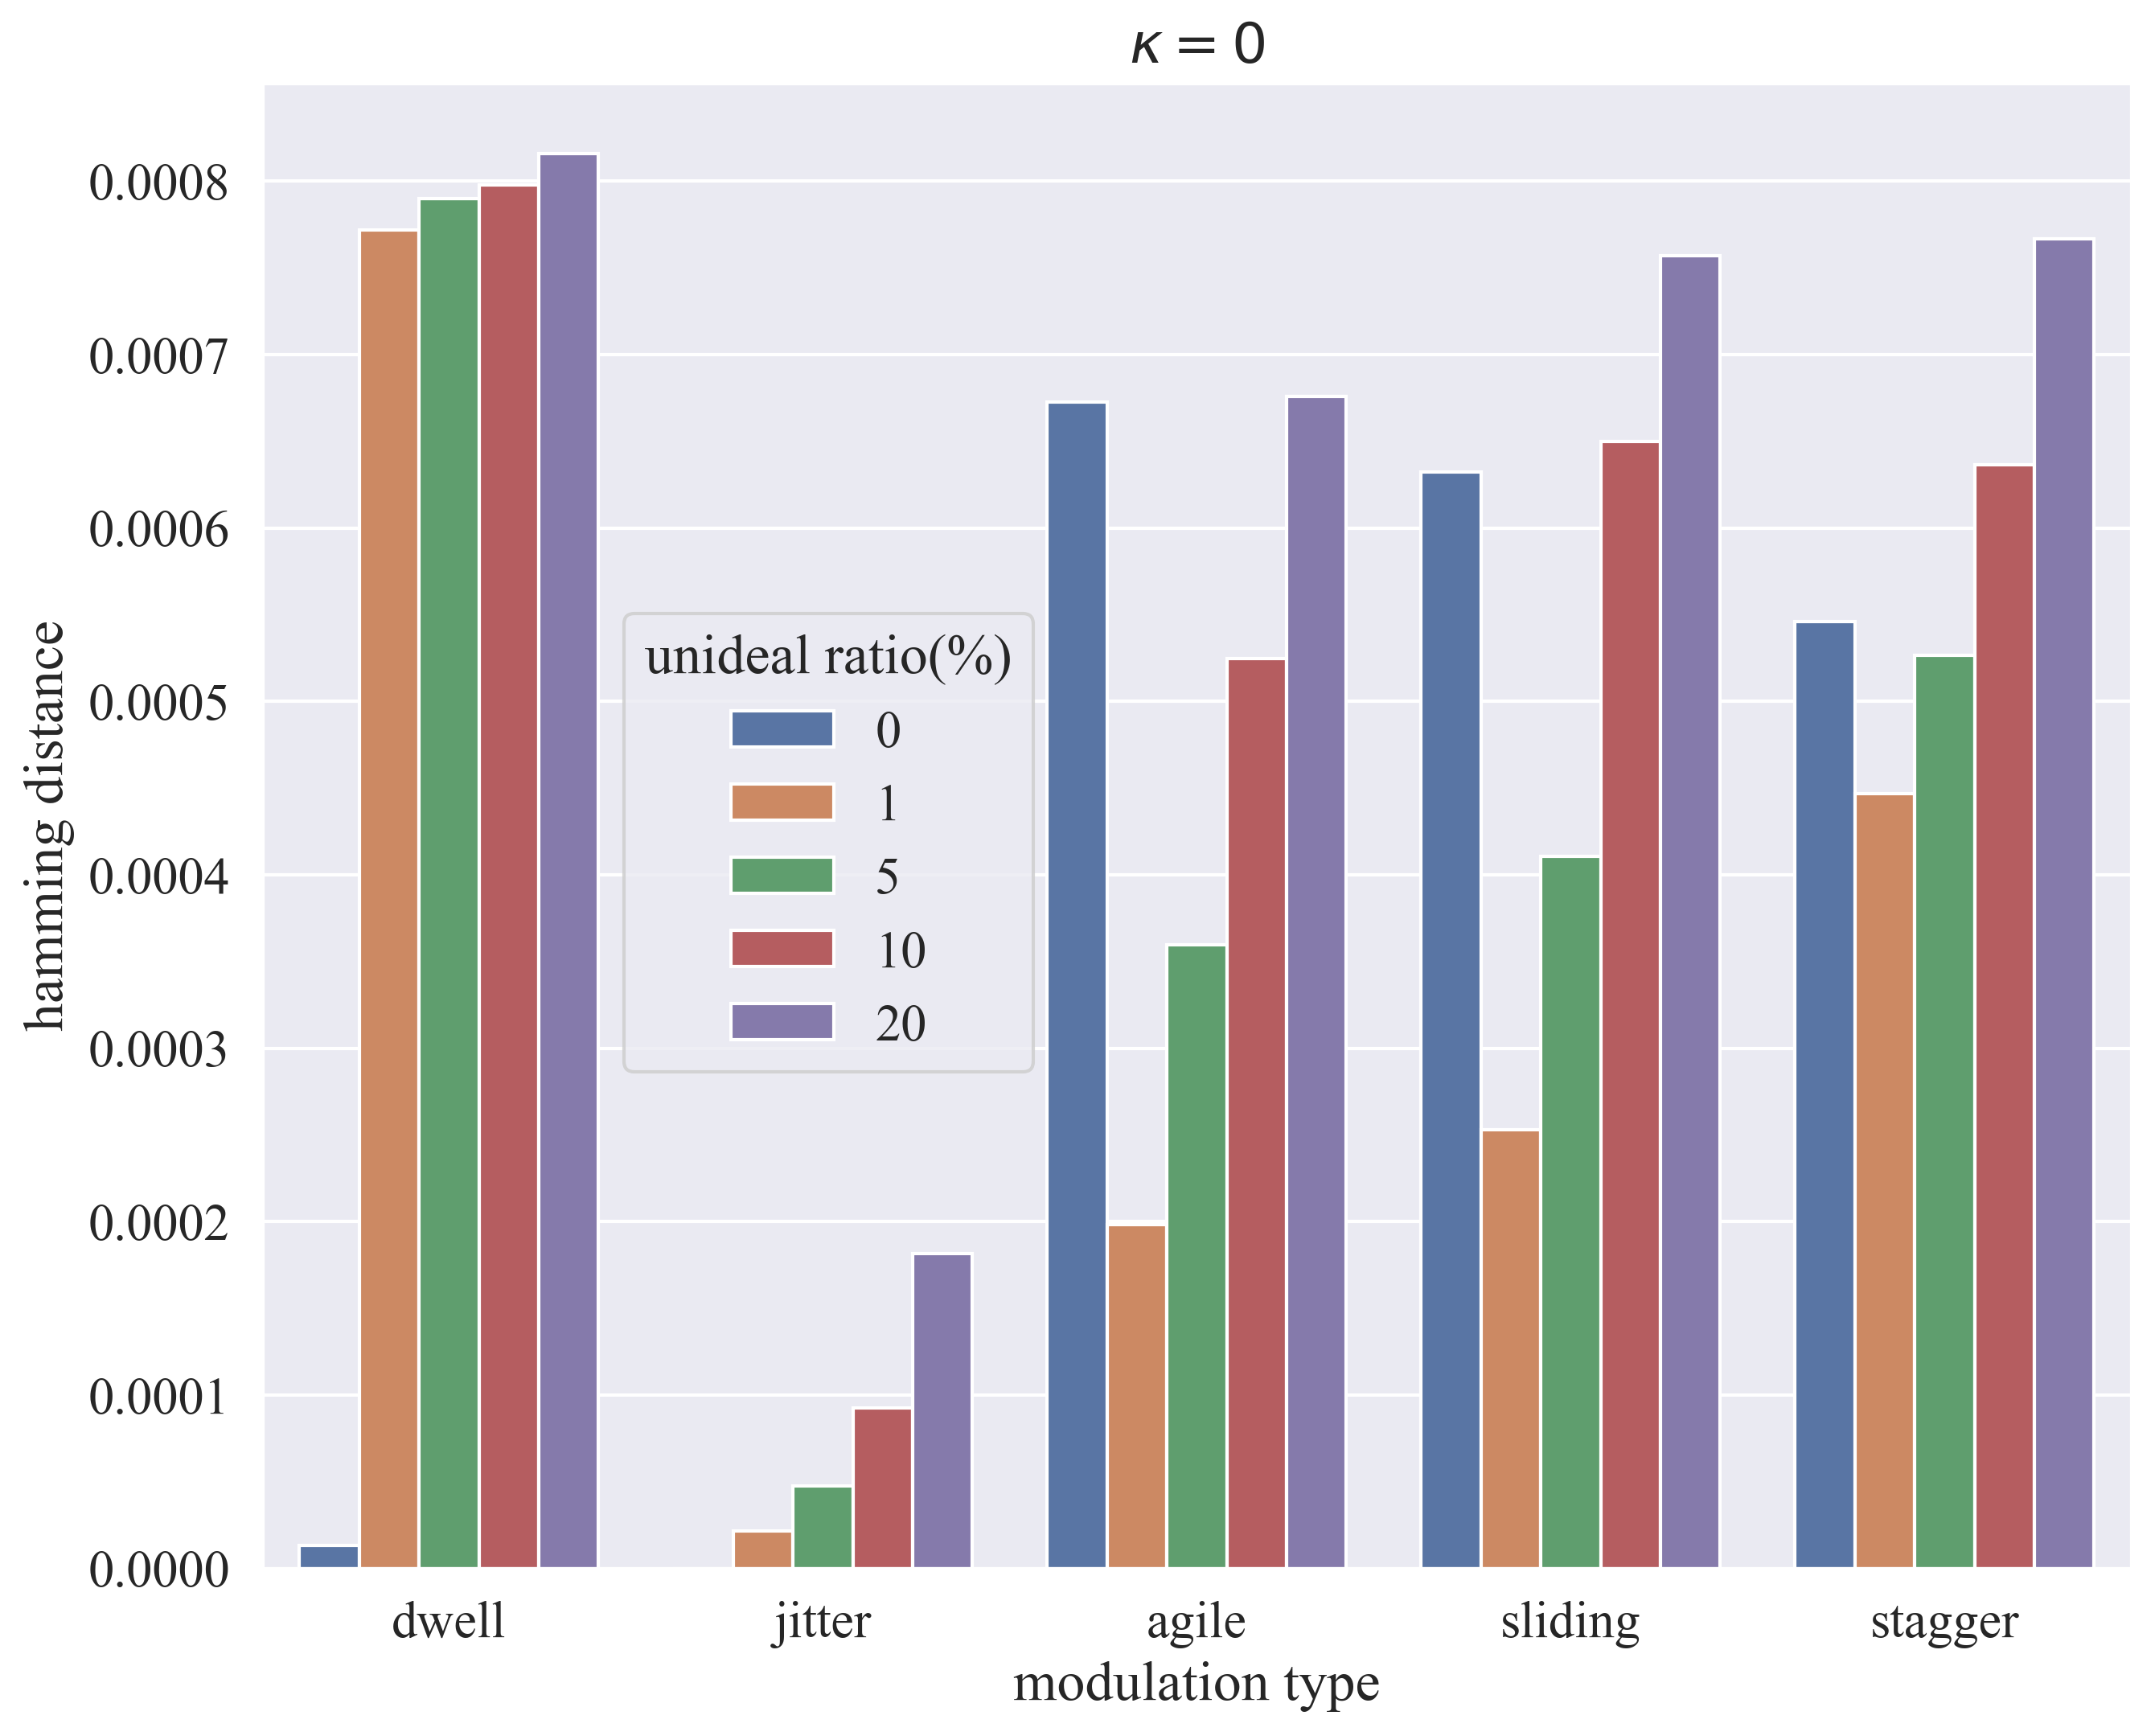

In [14]:
#读取
num = pd.read_csv("results/hamming_distance_unideal.csv")
num = pd.DataFrame(num)

#绘图，折线图
plt.figure(dpi=300,figsize=(10,8))
fig = sns.barplot(x='type', y='hamming distance', hue='unideal', data=num.loc[num['kappa']==0])
fig.set_xlabel('modulation type')
fig.set_ylabel('hamming distance')
fig.set_title("$\\kappa=0$")
fig.legend(title = 'unideal ratio(%)',bbox_to_anchor=(0.18, 0.66))


#保存
barfig.savefig("results/hamming_distance_unideal_kappa0.png",dpi=300)

##### kappa=0.5

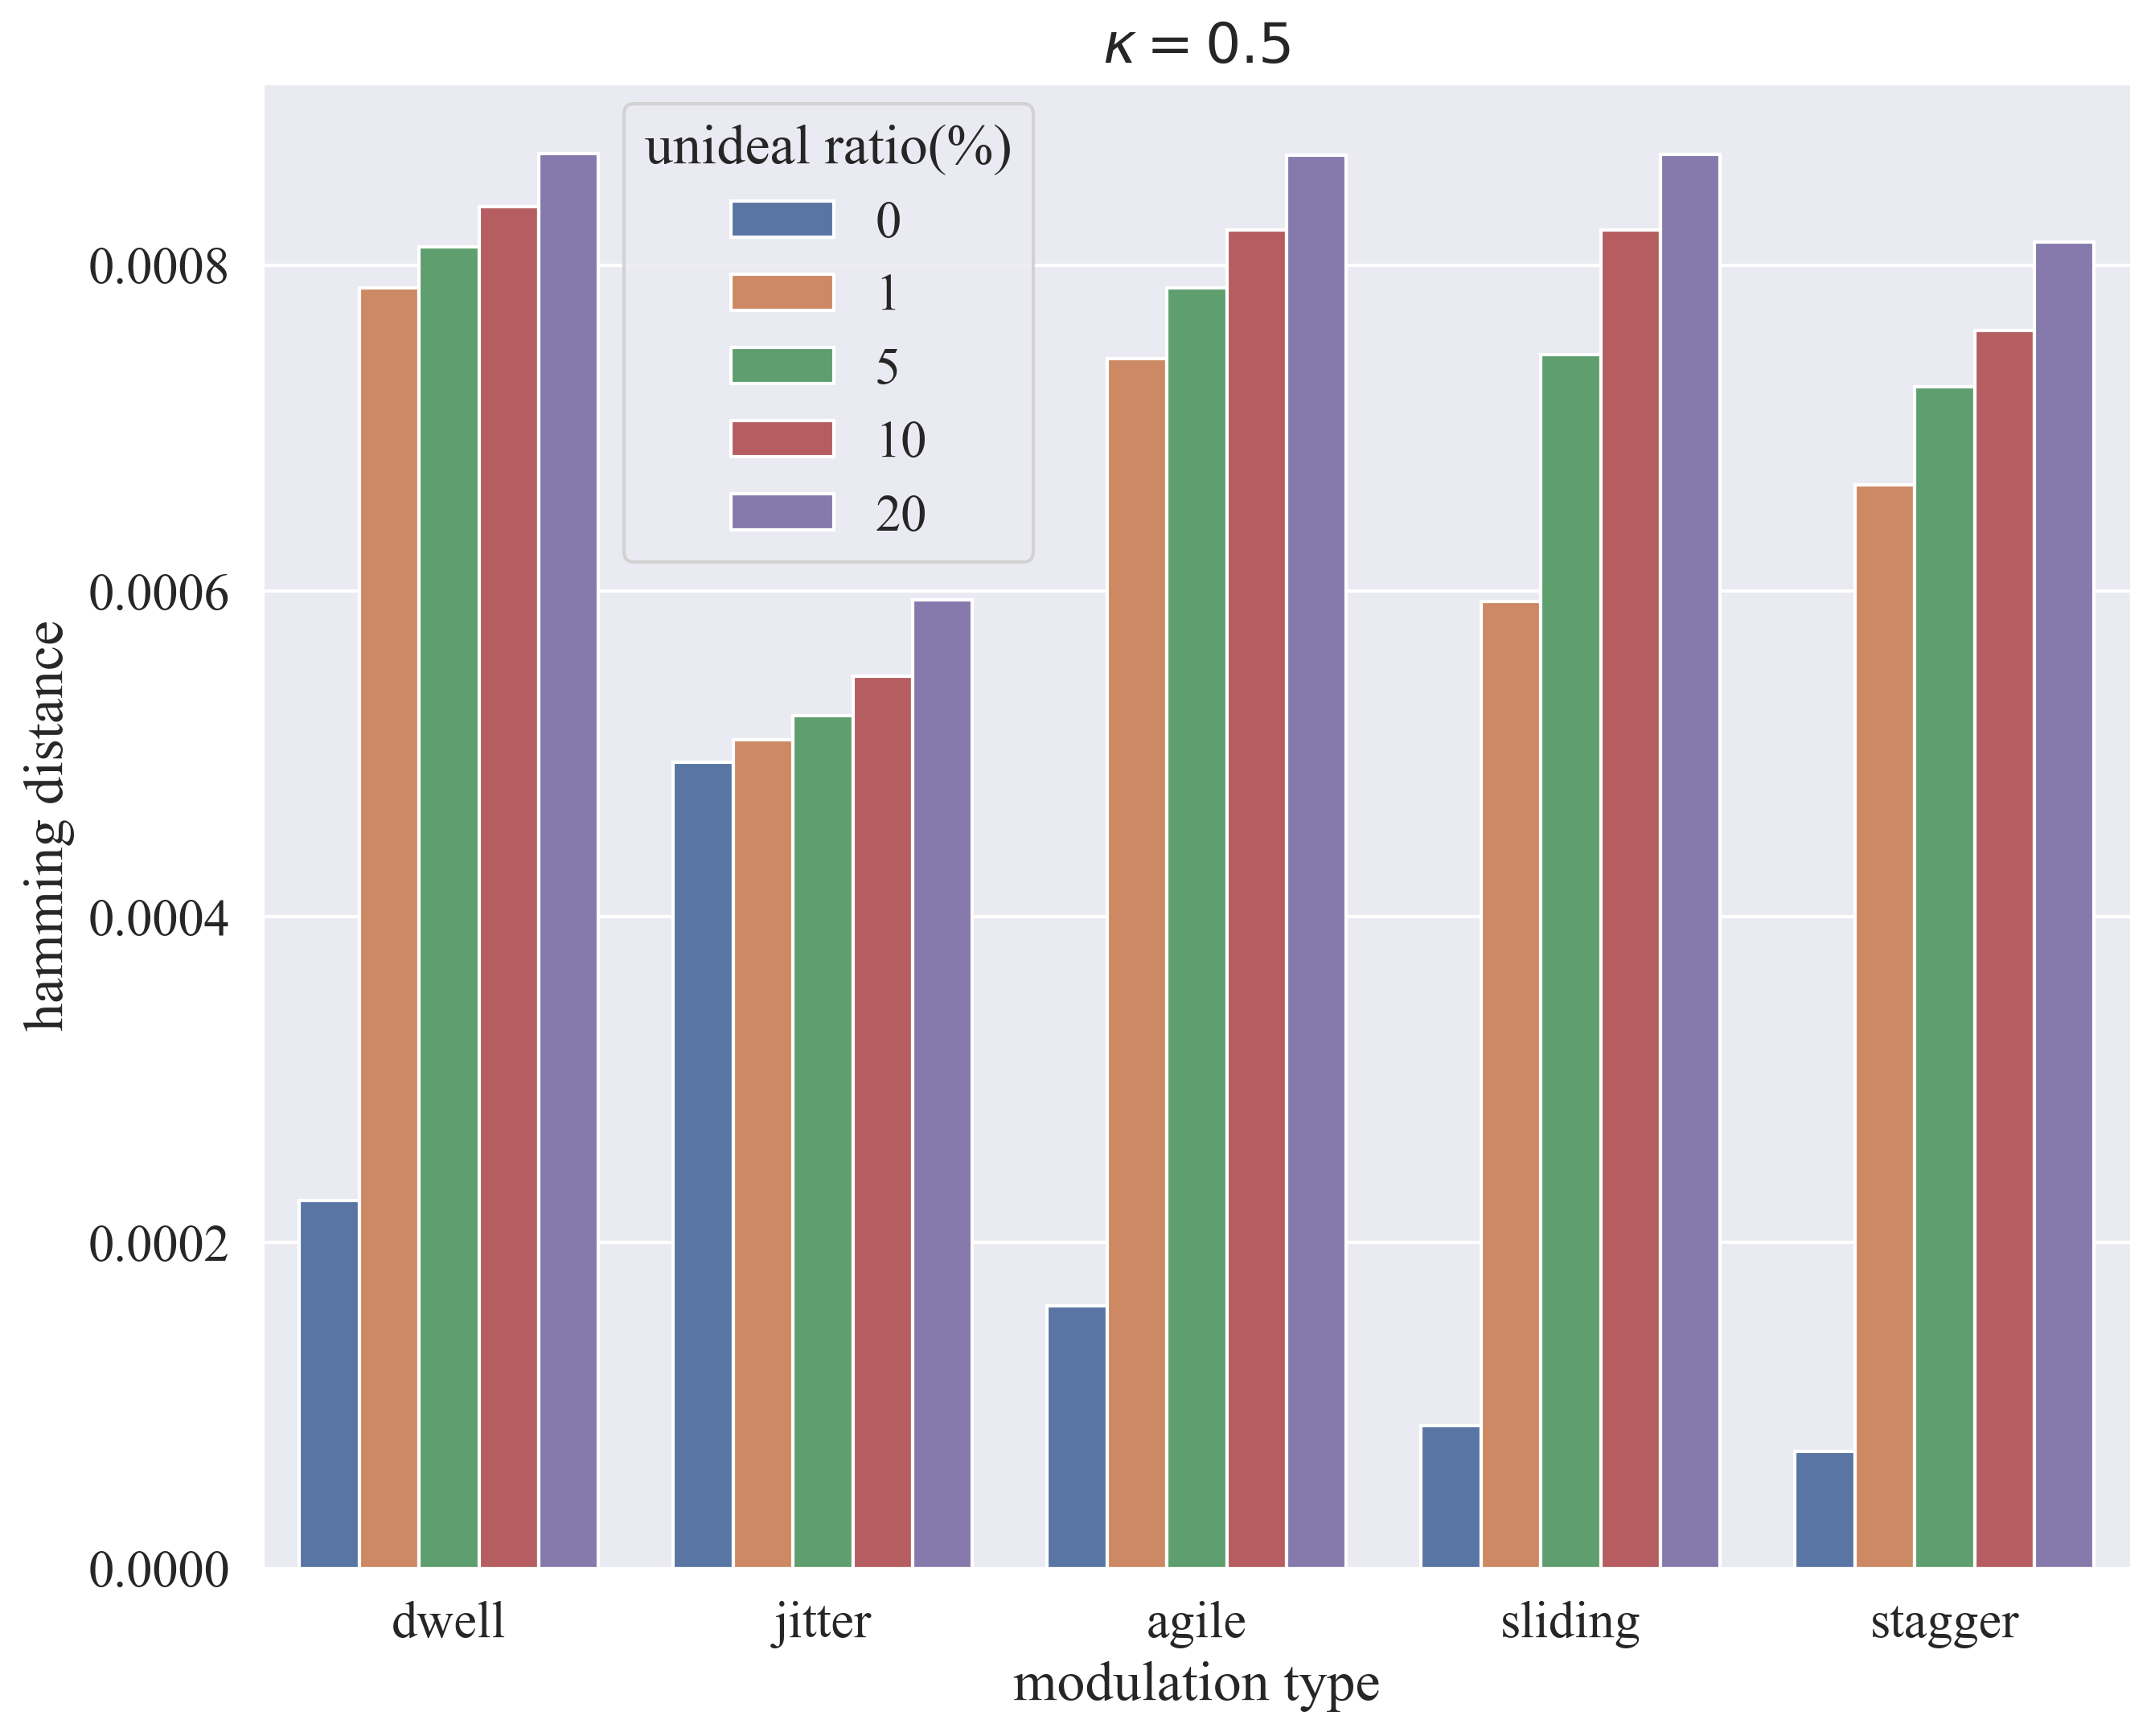

In [15]:
#读取
num = pd.read_csv("results/hamming_distance_unideal.csv")
num = pd.DataFrame(num)

#绘图，折线图
plt.figure(dpi=300,figsize=(10,8))
fig = sns.barplot(x='type', y='hamming distance', hue='unideal', data=num.loc[num['kappa']==0.5])
fig.set_xlabel('modulation type')
fig.set_ylabel('hamming distance')
fig.set_title("$\\kappa=0.5$")
fig.legend(title = 'unideal ratio(%)',bbox_to_anchor=(0.18, 0.66))


#保存
barfig.savefig("results/hamming_distance_unideal_kappa05.png",dpi=300)

#### 3.MSE

##### kappa=0

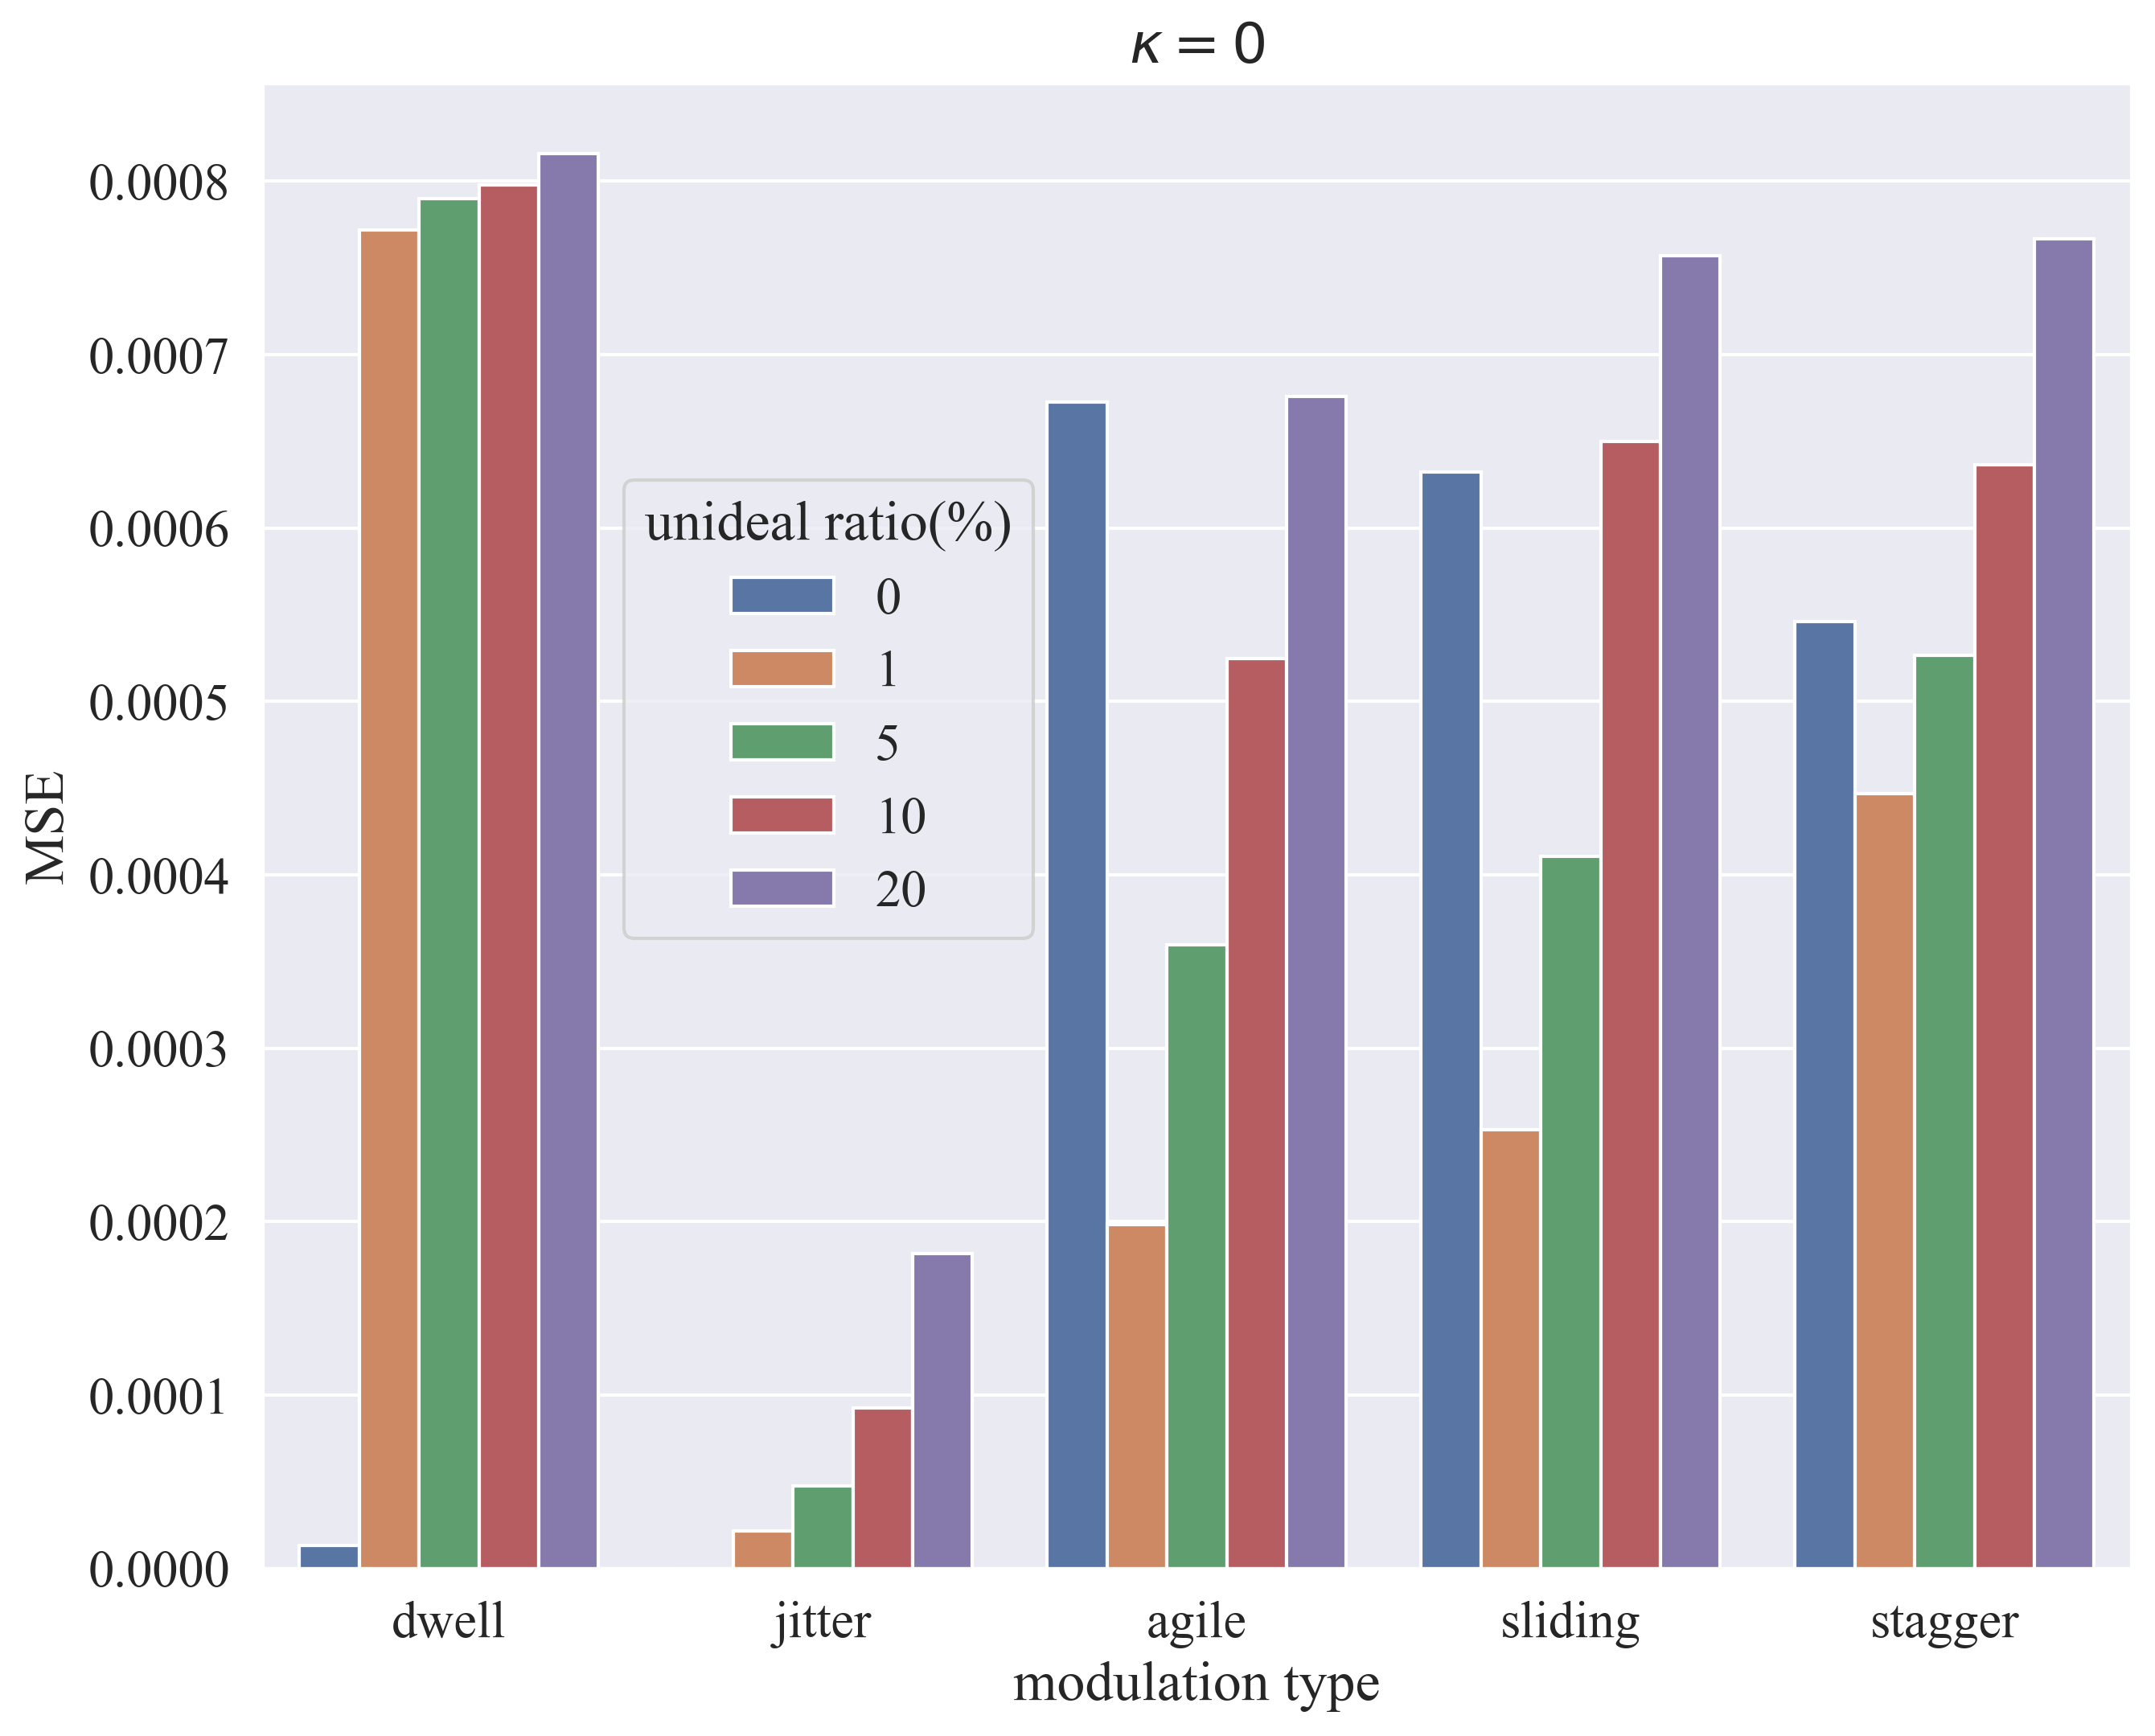

In [49]:
#读取
num = pd.read_csv("results/MSE_unideal.csv")
num = pd.DataFrame(num)

#绘图，折线图
plt.figure(dpi=300,figsize=(10,8))
fig = sns.barplot(x='type', y='MSE', hue='unideal', data=num.loc[num['kappa']==0])
fig.set_xlabel('modulation type')
fig.set_ylabel('MSE')
fig.set_title("$\\kappa=0$")
fig.legend(title = 'unideal ratio(%)',bbox_to_anchor=(0.18, 0.75))
# plt.legend(title='unideal ratio(%)',loc='best')

#保存
barfig.savefig("results/MSE_unideal_kappa0.png",dpi=300)

##### kappa=0.5

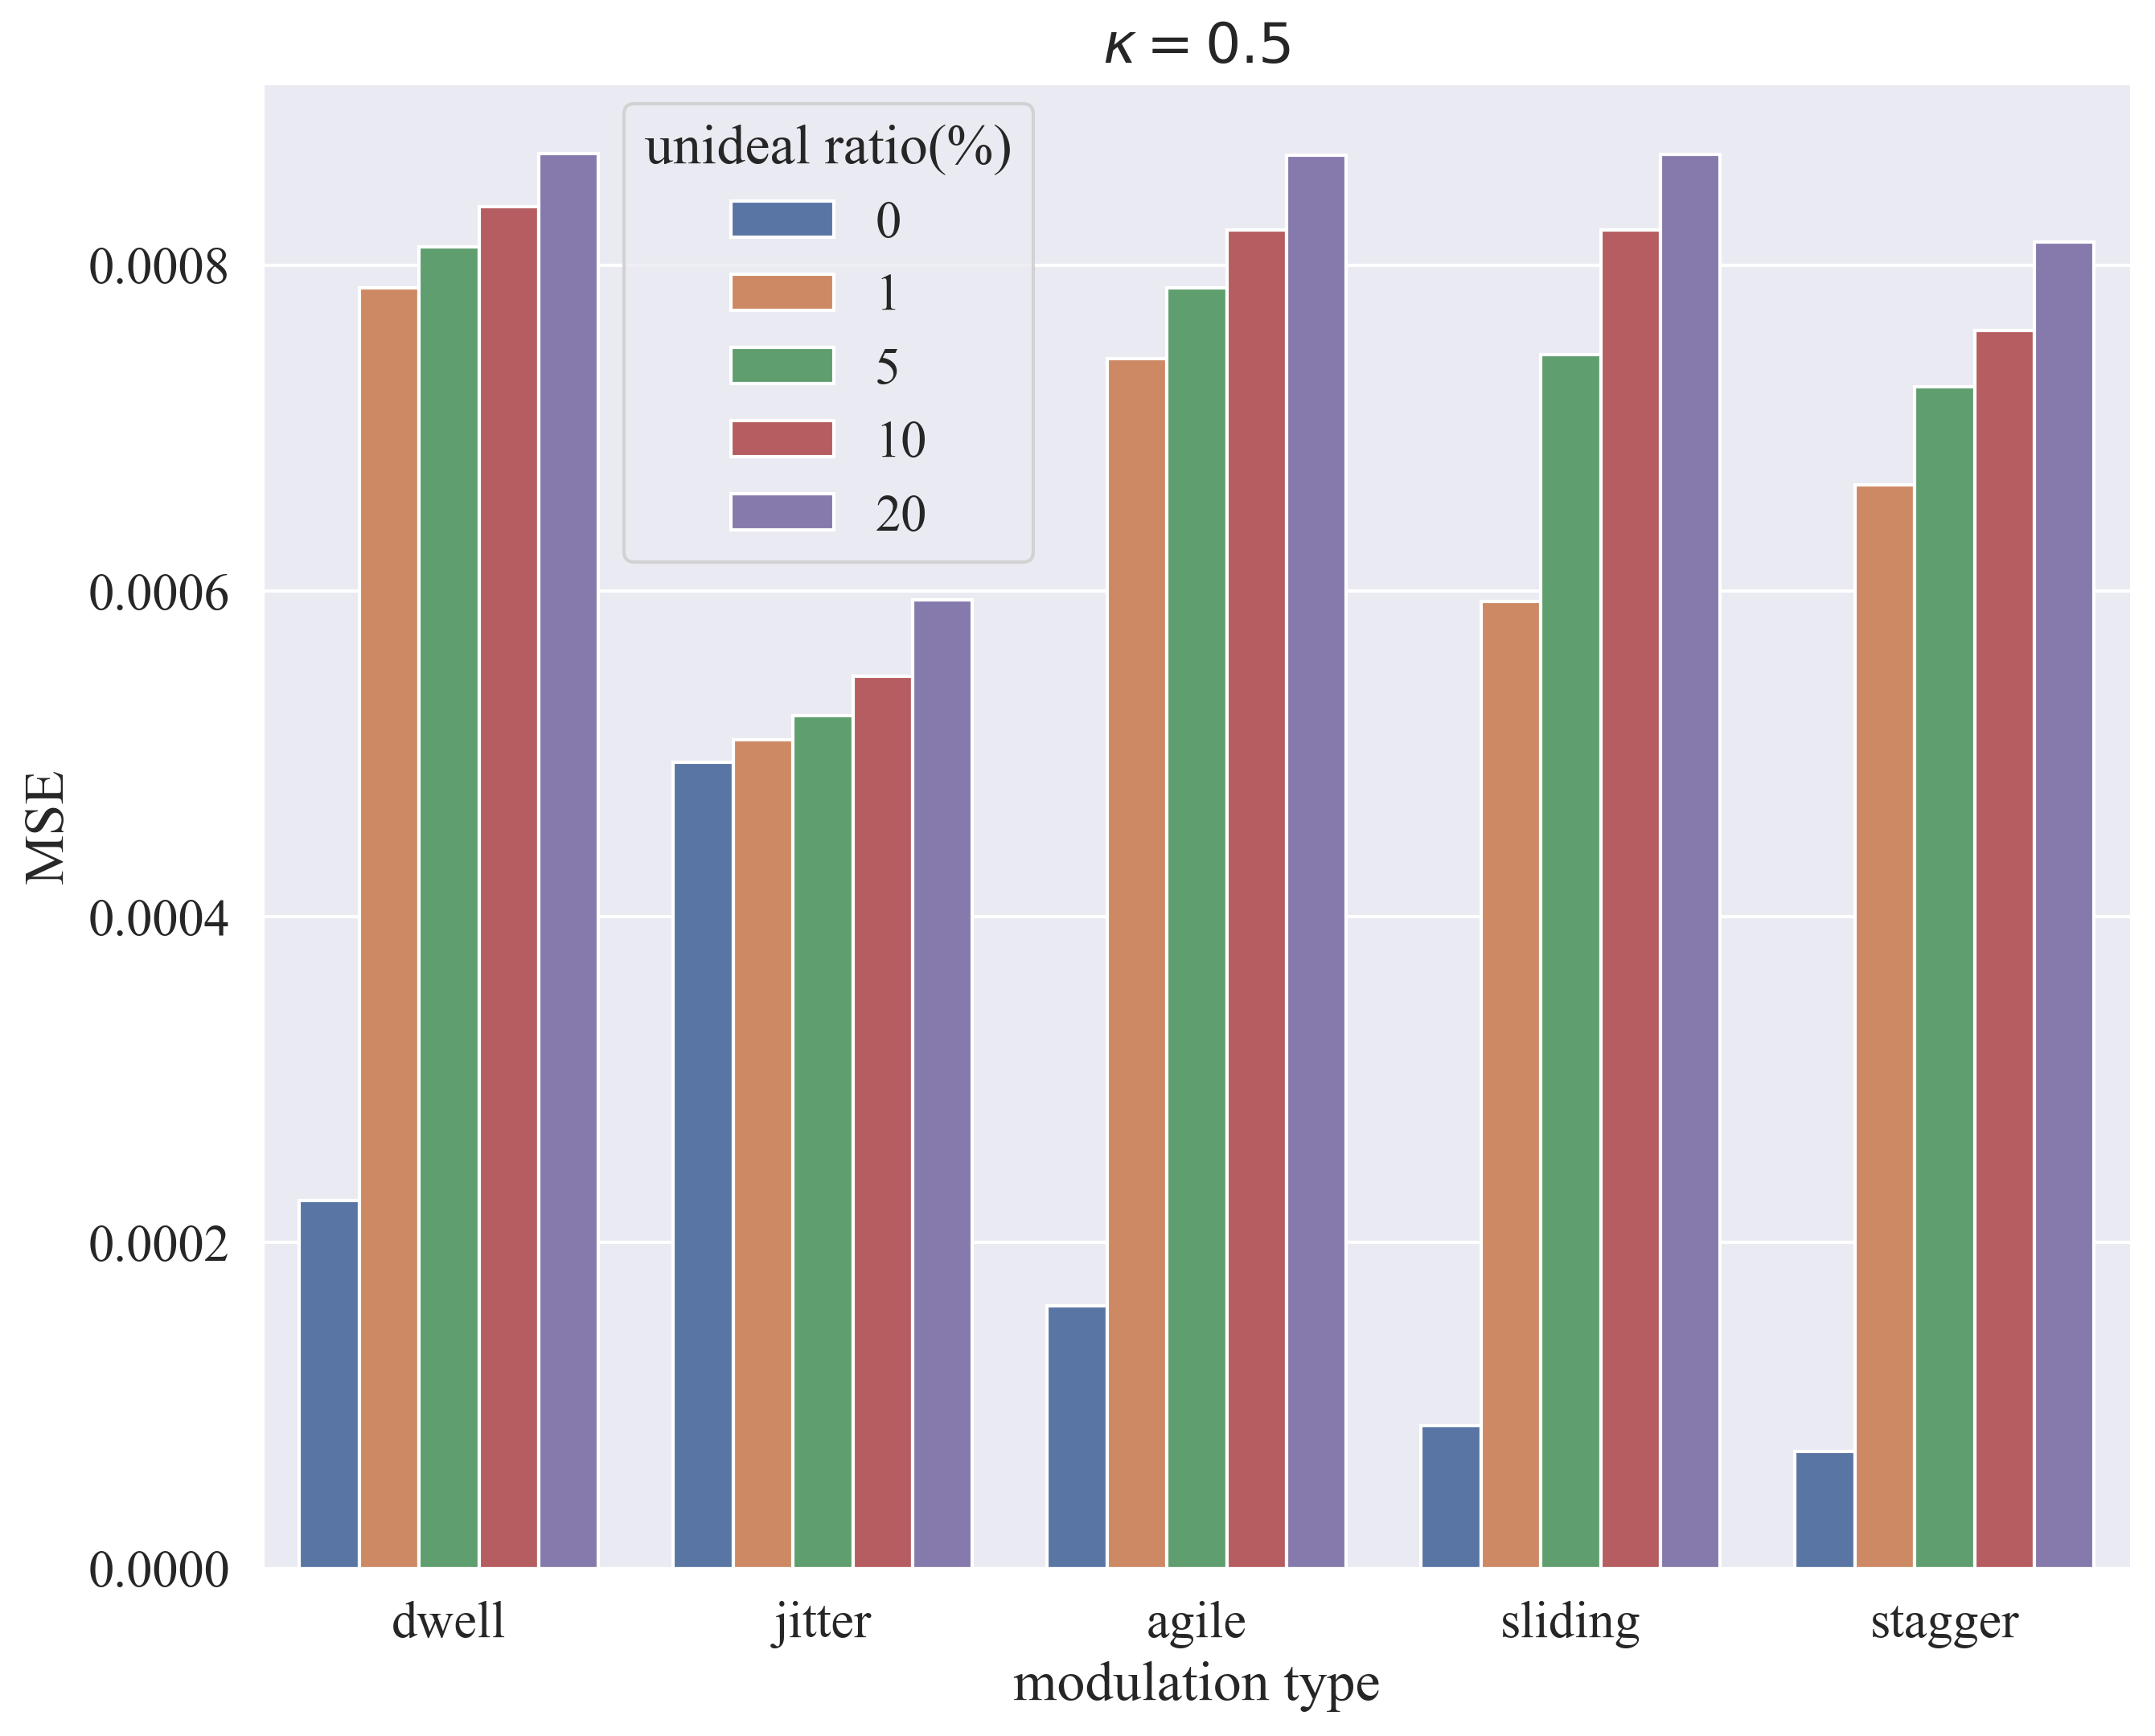

In [55]:
#读取
num = pd.read_csv("results/MSE_unideal.csv")
num = pd.DataFrame(num)

#绘图，折线图
plt.figure(dpi=300,figsize=(10,8))
fig = sns.barplot(x='type', y='MSE', hue='unideal', data=num.loc[num['kappa']==0.5])
fig.set_xlabel('modulation type')
fig.set_ylabel('MSE')
fig.set_title("$\\kappa=0.5$")
fig.legend(title = 'unideal ratio(%)',bbox_to_anchor=(0.18, 0.66))
# plt.legend(title='unideal ratio(%)',loc='best')

#保存
barfig.savefig("results/MSE_unideal_kappa05.png",dpi=300)

# PE task 实验2

在数据集中添加了非理想情况

绘制状态个数